In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

(-0.5, 7.5, 7.5, -0.5)

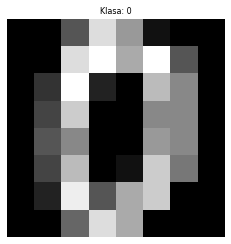

In [3]:
#wczytaj zbiór digits i podziel go na X i y
digits = load_digits()
X = digits.data
y = digits.target

#wyświetlenie pojedyńczego elementu ze zbioru, w tym przypadku o indeksie 0
sample_image = digits.images[0]

plt.imshow(sample_image, cmap='gray')
plt.title(f'Klasa: {digits.target[0]}', fontsize = 8)
plt.axis("off")


In [4]:
#podziel dane na treningowe i testowe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [5]:
#PCA wyznaczone dla 5 komponentów
pca = PCA(n_components=5) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [9]:
#stwórz klasyfikator kNN dla 3 sąsiadów, naucz go na zbiorze X_train_pca i zrób predykcję na X_test_pca
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
acc_pca=accuracy_score(y_test, y_pred_pca)
print(acc_pca)

0.9361111111111111


In [10]:
#stwórz klasyfikator kNN dla 3 sąsiadów, naucz go na zbiorze X_train i zrób predykcję na X_test
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.9833333333333333


In [11]:
#policz accuracy dla obu klasyfikatorów
accuracy_pca = acc_pca #todo
accuracy_full = acc#todo

print(f"Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: {accuracy_pca:.2f}")
print(f"Dokładność klasyfikacji na pełnych danych: {accuracy_full:.2f}")


Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.94
Dokładność klasyfikacji na pełnych danych: 0.98


In [14]:
#wykorzystując pętlę for sprawdź skuteczność klasyfikacji za pomocą kNN i PCA dla liczby komponentów od 1 do 64
for i in range(1,64+1):
    #todo
    pca = PCA(n_components=i) 
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    model = KNeighborsClassifier(n_neighbors = 3)
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    acc_pca=accuracy_score(y_test, y_pred_pca)
    print(f"Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: {acc_pca:.2f}, komponentów: {i}")

Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.31, komponentów: 1
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.60, komponentów: 2
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.78, komponentów: 3
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.88, komponentów: 4
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.94, komponentów: 5
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.95, komponentów: 6
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.96, komponentów: 7
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.96, komponentów: 8
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.97, komponentów: 9
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.98, komponentów: 10
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.98, komponentów: 11
Dokładność klasyfikacji na danych zredukowanych za pomocą PCA: 0.98, kompo